In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('mbta.csv')

In [4]:
df.head()

,service_date,gtfs_route_id,gtfs_route_short_name,gtfs_route_long_name,gtfs_route_desc,route_category,mode_type,peak_offpeak_ind,metric_type,otp_numerator,otp_denominator,cancelled_numerator,ObjectId
0,2023/09/30 04:00:00+00,Blue,NaN,Blue Line,Rapid Transit,Blue Line,Rail,OFF_PEAK,Passenger Wait Time,40148.279348,40633.521004,NaN,1
1,2023/09/30 04:00:00+00,Red,NaN,Red Line,Rapid Transit,Red Line,Rail,OFF_PEAK,Passenger Wait Time,46854.423718,50017.376381,NaN,2
2,2023/09/30 04:00:00+00,Green-B,B,Green Line B,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,10038.165348,13239.079648,NaN,3
3,2023/09/30 04:00:00+00,Green-C,C,Green Line C,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,13165.341440,16740.568400,NaN,4
4,2023/09/30 04:00:00+00,Green-D,D,Green Line D,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,15855.367597,20742.686822,NaN,5


In [17]:
bus_mask = df['mode_type'] == 'Bus'
df = df[bus_mask]

In [20]:
df['reliability'] = df.otp_numerator/df.otp_denominator
df.head()

C:\Users\91960\AppData\Local\Temp\ipykernel_19776\2438974342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reliability'] = df.otp_numerator/df.otp_denominator


,service_date,gtfs_route_id,gtfs_route_short_name,gtfs_route_long_name,gtfs_route_desc,route_category,mode_type,peak_offpeak_ind,metric_type,otp_numerator,otp_denominator,cancelled_numerator,ObjectId,reliability
7,2023/09/30 04:00:00+00,553,553,NaN,Express Bus,Other Bus,Bus,OFF_PEAK,Headway / Schedule Adherence,39.0,55.0,NaN,8,0.709091
8,2023/09/30 04:00:00+00,34E,34E,NaN,Local Bus,Other Bus,Bus,OFF_PEAK,Headway / Schedule Adherence,448.0,837.0,NaN,9,0.535245
9,2023/09/30 04:00:00+00,36,36,NaN,Local Bus,Other Bus,Bus,OFF_PEAK,Headway / Schedule Adherence,342.0,441.0,NaN,10,0.775510
10,2023/09/30 04:00:00+00,411,411,NaN,Local Bus,Other Bus,Bus,OFF_PEAK,Headway / Schedule Adherence,58.0,153.0,NaN,11,0.379085
11,2023/09/30 04:00:00+00,429,429,NaN,Local Bus,Other Bus,Bus,OFF_PEAK,Headway / Schedule Adherence,122.0,192.0,NaN,12,0.635417


In [25]:
df.gtfs_route_id.nunique()

184

In [24]:
df.shape

(708397, 14)

In [26]:
tf = df.groupby('gtfs_route_id')['reliability'].mean()

In [28]:
tf.sort_values()

gtfs_route_id
9703             0.320094
449              0.402552
448              0.406302
459              0.429970
747              0.454809
                   ...   
73               0.819827
742              0.835040
CR-Shuttle001    0.858203
CR-Shuttle002    0.858203
CR-Shuttle003    0.925859
Name: reliability, Length: 184, dtype: float64

<AxesSubplot: xlabel='gtfs_route_id'>

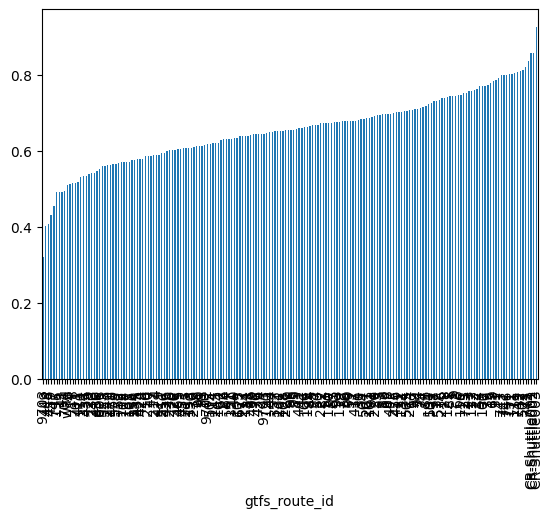

In [32]:
tf.sort_values().plot(kind='bar')

<AxesSubplot: xlabel='gtfs_route_id'>

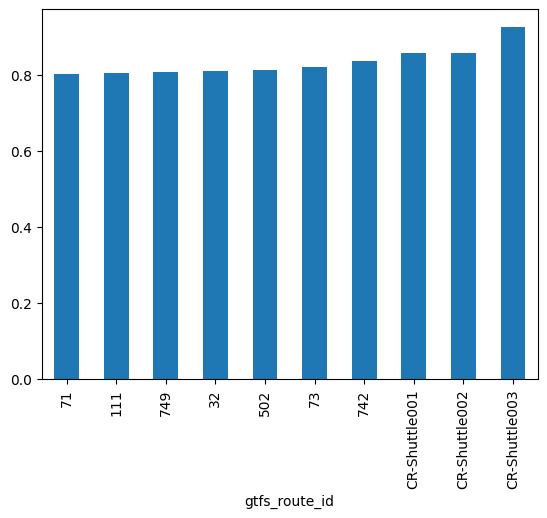

In [33]:
tf.sort_values()[-10:].plot(kind='bar')